In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import style
import pandas as pd
import numpy as np

import matplotlib as mpl
from scipy.stats import ttest_ind

In [2]:
res_df = pd.read_pickle('./results/StereoSeq_benchmark/pairwise_stats_results.pkl')

In [3]:
my_palette = [np.array([157,60,135]) / 255] + sns.color_palette('Paired')[0:3]+sns.color_palette('Paired')[4:8]+sns.color_palette('Paired')[11:12]
methods = ['Spateo', 'PASTE', 'PASTE2', 'Moscot', 'SLAT']

C:\Users\lyf04\AppData\Local\Temp\ipykernel_10680\2300298775.py:14: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  g = sns.barplot(


Spateo - Moscot: p-value:3.138508869759068e-08
Spateo - SLAT: p-value:2.328684805424118e-08


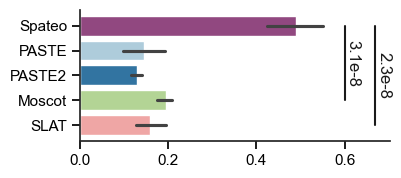

In [5]:
import matplotlib as mpl
import os
sns.set_theme(style="ticks")
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams.update({'text.color' : COLOR,
                     'axes.labelcolor' : COLOR})

fig, ax = plt.subplots(1,1,figsize=(4,1.7), gridspec_kw={'wspace':0.05})
sns.set_theme(style="ticks")
g = sns.barplot(
    x="label_spatial_consistency", 
    y="Method",
    hue="Method",
    data=res_df,
    ax=ax,
    palette=my_palette,
)

ax.set_ylabel('')
ax.set_xlabel('')

y = 0.6
h = 0.02
x1 = 0
x2 = 3
group1 = res_df[res_df['Method'] == methods[x1]]['label_spatial_consistency']
group2 = res_df[res_df['Method'] == methods[x2]]['label_spatial_consistency']
t_stat, p_val = ttest_ind(group1, group2)
print(f'{methods[x1]} - {methods[x2]}: p-value:{p_val}')
ax.plot([y, y], [x1, x2], lw=1.5, c='k')
ax.text(1.03*y, (x1 + x2) * .5, '3.1e-8', ha='center', va='center', c='k', rotation=-90)

y = 0.67
h = 0.02
x1 = 0
x2 = 4
group1 = res_df[res_df['Method'] == methods[x1]]['label_spatial_consistency']
group2 = res_df[res_df['Method'] == methods[x2]]['label_spatial_consistency']
t_stat, p_val = ttest_ind(group1, group2)
print(f'{methods[x1]} - {methods[x2]}: p-value:{p_val}')
ax.plot([y, y], [x1, x2], lw=1.5, c='k')
ax.text(1.03*y, (x1 + x2) * .5, '2.3e-8', ha='center', va='center', c='k', rotation=-90)
sns.despine(top=True, right=True)

plt.savefig('./figures/pairwise_benchmark/StereoSeq.pdf', dpi=300, bbox_inches='tight', transparent=True)